# Loading Dataset

In [1]:
import pandas as pd
df = pd.read_json('data.json')

In [2]:
df.head()

,category,description,title,also_buy,brand,rank,main_cat,date,price,asin,imageURL
0,"[Grocery & Gourmet Food, Cooking & Baking, Sug...","[Shipped from UK, please allow 10 to 21 busine...",Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,"315,867 in Grocery & Gourmet Food (",Grocery,,,0853347867,[https://images-na.ssl-images-amazon.com/image...
1,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[Lipton Yellow Label Tea use only the finest t...,Lipton Yellow Label Tea (loose tea) - 450g,"[B00886E4K0, B00CREXSHY, B001QTRGAQ, B002EYZM4...",Lipton,"30,937 in Grocery & Gourmet Food (",Grocery,,$12.46,4639725043,[https://images-na.ssl-images-amazon.com/image...
2,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[Lipton Yellow Label Teabags uses a new way to...,Lipton Yellow Label Finest Blend Tea Bags 100 ...,"[B000JSQDK4, B007ZI1SKG, 4639725043, B00KPFHOP...",Lipton,"15,487 in Grocery & Gourmet Food (",Grocery,,$12.98,4639725183,[https://images-na.ssl-images-amazon.com/image...
3,"[Grocery & Gourmet Food, Canned, Jarred & Pack...",[Dishes cooked with nutrela are very tasty and...,Nutrela High Protein Soya Chunks 200g (Pack of 6),"[B002FBD900, B00015YTS8, B00B3ARYDC, B002DMUIE...",Nutrela,"195,125 in Grocery & Gourmet Food (",Grocery,,$24.99,5236363640,[]
4,"[Grocery & Gourmet Food, Beverages, Coffee, Te...","[20 Sachets, Empty contents into cup\nPour 8oz...",Organo Gold Cafe Supreme 100% Certified Ganode...,"[B00F3XJX6G, B003CY45VG, B003CGJAIM, B00E1C3FJ...",Organo Gold,"89,943 in Grocery & Gourmet Food (",Grocery,,$29.90,5463213682,[https://images-na.ssl-images-amazon.com/image...


# Data Quality Check results

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Check for empty strings in the 'price' column (representing missing values)
empty_strings_in_price = (df['price'] == '').sum()

# Calculate descriptive statistics for the 'also_buy' column (e.g., average number of products bought together)
also_buy_stats = df['also_buy'].apply(len).describe()

print("Missing values--\n", missing_values)
print("Empty values in price--\n", empty_strings_in_price)
print("Also buy stats--\n",also_buy_stats)

Missing values--
 category       0
description    0
title          0
also_buy       0
brand          0
rank           0
main_cat       0
date           0
price          0
asin           0
imageURL       0
dtype: int64
Empty values in price--
 28900
Also buy stats--
 count    83294.000000
mean        32.537061
std         31.795178
min          1.000000
25%          5.000000
50%         20.000000
75%         54.000000
max        100.000000
Name: also_buy, dtype: float64


#### From dataset we can see that, Although date has missing values its not showing up, and assuming there is no significance in using date while predicting recommendating, dropiing date column. data.

Mean: 32.25 (on average, each product is bought with about 32 other products)
Standard Deviation: 31.41 (the spread of the data is quite large)
Min: 1 (minimum number of products bought together)
Max: 100 (maximum number of products bought together)
25th, 50th, and 75th Percentiles: These give us an idea of the distribution of the data.data.

In [5]:
df.drop('date', axis=1)

,category,description,title,also_buy,brand,rank,main_cat,price,asin,imageURL
0,"[Grocery & Gourmet Food, Cooking & Baking, Sug...","[Shipped from UK, please allow 10 to 21 busine...",Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,"315,867 in Grocery & Gourmet Food (",Grocery,,0853347867,[https://images-na.ssl-images-amazon.com/image...
1,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[Lipton Yellow Label Tea use only the finest t...,Lipton Yellow Label Tea (loose tea) - 450g,"[B00886E4K0, B00CREXSHY, B001QTRGAQ, B002EYZM4...",Lipton,"30,937 in Grocery & Gourmet Food (",Grocery,$12.46,4639725043,[https://images-na.ssl-images-amazon.com/image...
2,"[Grocery & Gourmet Food, Beverages, Coffee, Te...",[Lipton Yellow Label Teabags uses a new way to...,Lipton Yellow Label Finest Blend Tea Bags 100 ...,"[B000JSQDK4, B007ZI1SKG, 4639725043, B00KPFHOP...",Lipton,"15,487 in Grocery & Gourmet Food (",Grocery,$12.98,4639725183,[https://images-na.ssl-images-amazon.com/image...
3,"[Grocery & Gourmet Food, Canned, Jarred & Pack...",[Dishes cooked with nutrela are very tasty and...,Nutrela High Protein Soya Chunks 200g (Pack of 6),"[B002FBD900, B00015YTS8, B00B3ARYDC, B002DMUIE...",Nutrela,"195,125 in Grocery & Gourmet Food (",Grocery,$24.99,5236363640,[]
4,"[Grocery & Gourmet Food, Beverages, Coffee, Te...","[20 Sachets, Empty contents into cup\nPour 8oz...",Organo Gold Cafe Supreme 100% Certified Ganode...,"[B00F3XJX6G, B003CY45VG, B003CGJAIM, B00E1C3FJ...",Organo Gold,"89,943 in Grocery & Gourmet Food (",Grocery,$29.90,5463213682,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...
83289,"[Grocery & Gourmet Food, Condiments & Salad Dr...","[A unique blend of herbs, Just Goddess from Ha...","HAMPTON CREEK Just Goddess Dressing, 12 Fluid ...","[B01HJEHE9E, B01HJF6FRA, B01N6LF9LZ]",Hampton Creek,"492,676 in Grocery & Gourmet Food (",Grocery,,B01HJEO4QK,[]
83290,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",[Caffarel fruit jellies are a product of Italy...,"Caffarel Fruit Jellies, Organic Assorted, 200 ...","[B01HULC3TC, B07C8L4NWL, B014UTG6D6, B01M3UOLAP]",Caffarel,"369,384 in Grocery & Gourmet Food (",Grocery,,B01HJFBN9A,[]
83291,"[Grocery & Gourmet Food, Condiments & Salad Dr...",[Hampton Creeks Just Mayo Truffle makes fancy ...,"HAMPTON CREEK Spo Just Truffle Mayo, 12 Ounce","[B00WNAEX2Q, B071LD7PMJ, B01HJF6FRA, B072HG8GF...",Hampton Creek,"113,710 in Grocery & Gourmet Food (",Grocery,$10.89,B01HJFC704,[]
83292,"[Grocery & Gourmet Food, Condiments & Salad Dr...",[Nothing compares with the classically zesty f...,"HAMPTON CREEK Just Ranch Dressing, 12 Fluid Ounce","[B071LD7PMJ, B00KOHNX6C, B00OVN2F64, B01HJEHE9...",Hampton Creek,"21,731 in Grocery & Gourmet Food (",Grocery,$10.95,B01HJF6FRA,[]


In [6]:
column_to_print = df['price'].unique()

## cleaning price column

In [7]:

# Convert 'price' column to strings
df['price'] = df['price'].astype(str)
# Clean 'price' column by removing non-numeric characters and empty strings
df['price'] = df['price'].str.replace('[^\d.]', '', regex=True)

# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Check again for NaN values in the 'price' column
if df['price'].isna().any():
    print("There were NaN values in the 'price' column. They have been replaced.")
else:
    print("There are no NaN values in the 'price' column.")

There were NaN values in the 'price' column. They have been replaced.


# Data Analysis

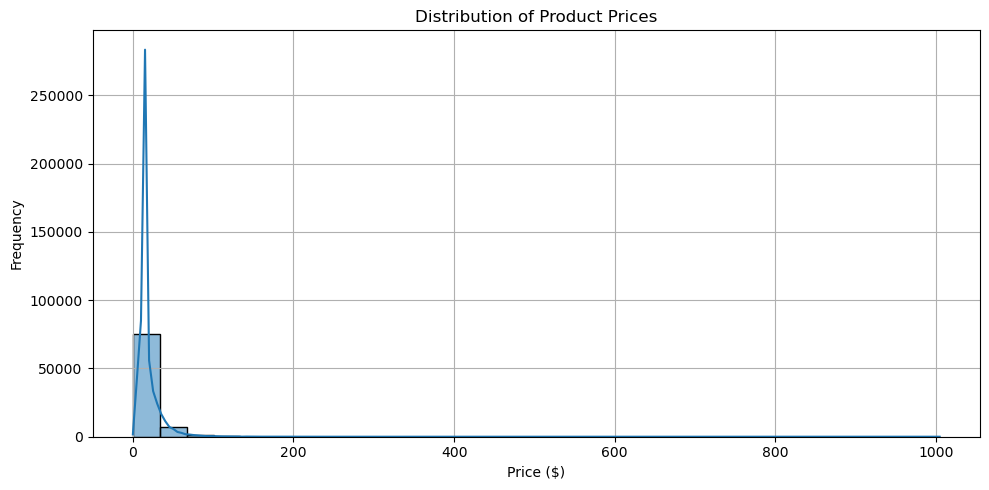

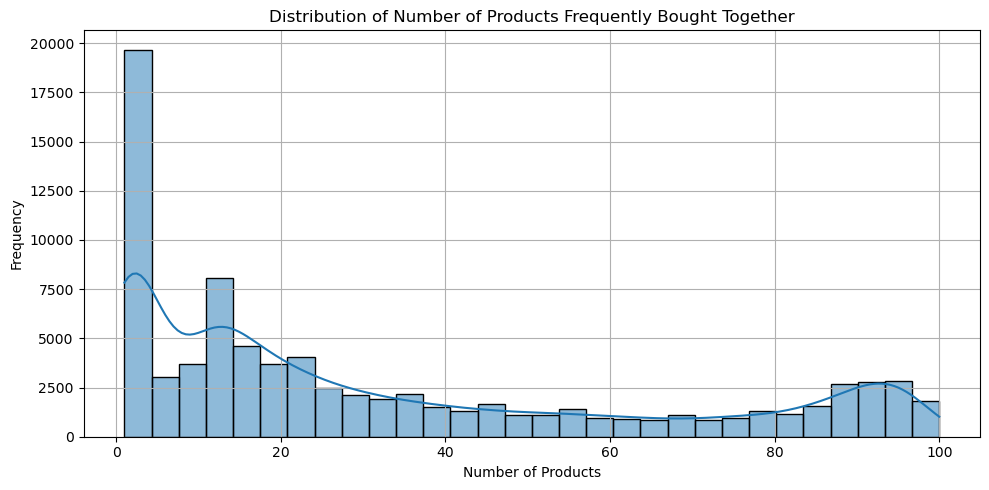

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values in the 'price' column with the median price
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

# Visualizing the distribution of product prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualizing the distribution of the number of products frequently bought together
also_buy_lengths = df['also_buy'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(also_buy_lengths, bins=30, kde=True)
plt.title('Distribution of Number of Products Frequently Bought Together')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# The visualizations provide the following insights:

Distribution of Product Prices:

The majority of products are priced below 50 Dollars, with a peak observed in the lower price range (below $20).
There are a few products with prices extending towards 100 Dollars, indicating the presence of some more expensive items in the dataset.
Distribution of Number of Products Frequently Bought Together:

Most products are frequently bought with approximately 0 to 50 other products.
The distribution shows a long tail, indicating that there are a few products that are bought together with a large number of other products (up to 100).

# Category Analysis

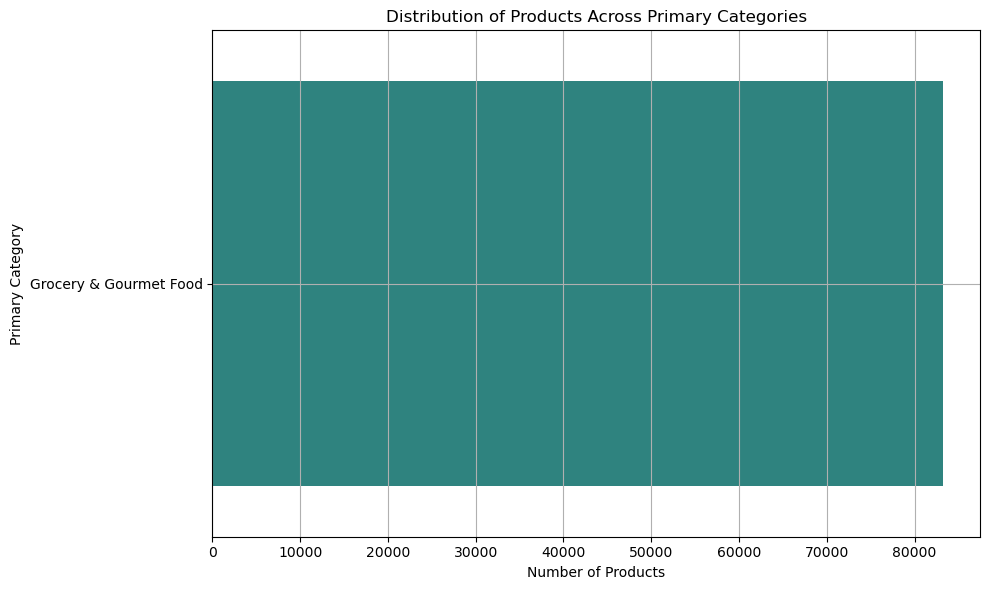

Grocery & Gourmet Food    83294
Name: primary_category, dtype: int64

In [9]:
# Extracting the primary category (first level) for each product and creating a new column for it
df['primary_category'] = df['category'].apply(lambda x: x[0] if x else 'Unknown')

# Counting the number of products in each primary category
category_counts = df['primary_category'].value_counts()

# Visualizing the distribution of products across the primary categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Distribution of Products Across Primary Categories')
plt.xlabel('Number of Products')
plt.ylabel('Primary Category')
plt.grid(True)
plt.tight_layout()
plt.show()

category_counts


It appears that all the products in the dataset belong to the "Grocery & Gourmet Food" primary category. This indicates that our dataset is focused on a specific category, which can be beneficial as the products are more likely to be related and thus can result in more relevant recommendations.

# Create Co-Purchase List

In [10]:
co_purchase_list = []
for index, row in df.iterrows():
    main_asin = row['asin']
    also_buy_asins = row['also_buy']
    co_purchase_pairs = [(main_asin, other_asin) for other_asin in also_buy_asins]
    co_purchase_list.extend(co_purchase_pairs)
co_purchase_df = pd.DataFrame(co_purchase_list, columns=['asin1', 'asin2'])

# Create a co-purchase frequency matrix

In [11]:
co_purchase_frequency = co_purchase_df.groupby(['asin1', 'asin2']).size().reset_index(name='frequency')

# Create Sparse Matrix

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

In [13]:
all_asins = pd.concat([co_purchase_frequency['asin1'], co_purchase_frequency['asin2']]).unique()
asin_to_code = {asin: i for i, asin in enumerate(all_asins)}
code_to_asin = {i: asin for asin, i in asin_to_code.items()}

# Calculate Cosine Similarity

In [14]:
# train_cosine_sim = cosine_similarity(co_purchase_sparse_matrix, dense_output=False)

# Create Utility Functions

In [15]:
def get_product_title(asin):
    try:
        return df[df['asin'] == asin]['title'].values[0]
    except IndexError:
        return 'Unknown Product'


# Create Recommendation Function

In [16]:
def recommend_products(product_name, num_recommendations=5):
    try:
        # Get the ASIN for the input product name
        product_asin = df[df['title'].str.contains(product_name, case=False, na=False)]['asin'].values[0]
        
        # Get the product code for the input ASIN
        product_code = asin_to_code[product_asin]
        
        # Get the similarity scores for the input product
        similarity_scores = train_cosine_sim[product_code]
        
        # Get the indices of the top 'num_recommendations' products
        similar_products = similarity_scores.toarray().ravel().argsort()[-num_recommendations-1:-1][::-1]
        
        # Get the ASINs of the top 'num_recommendations' products
        recommended_asins = [code_to_asin[code] for code in similar_products]
        
        # Get the titles of the top 'num_recommendations' products
        recommended_titles = [get_product_title(asin) for asin in recommended_asins]
        
        return recommended_titles
    except (IndexError, KeyError):
        return 'Product not found in the dataset'

In [17]:
# Step 5: Split the data into training and testing sets
train_data, test_data = train_test_split(co_purchase_frequency, test_size=0.2, random_state=42)

# Step 6: Create a training sparse matrix
train_sparse_matrix = csr_matrix((train_data['frequency'], 
                                  (train_data['asin1'].map(asin_to_code), 
                                   train_data['asin2'].map(asin_to_code))))

# Step 7: Create a testing sparse matrix
test_sparse_matrix = csr_matrix((test_data['frequency'], 
                                 (test_data['asin1'].map(asin_to_code), 
                                  test_data['asin2'].map(asin_to_code))))


# Calculating cosine similarity scores for the training data
train_cosine_sim = cosine_similarity(train_sparse_matrix, dense_output=False)

In [17]:
# Define functions to calculate precision, recall, and F1-score
def calculate_metrics(test_matrix, sim_matrix, top_n):
    precisions = []
    recalls = []
    for idx in range(test_matrix.shape[0]):
        # Get the ground truth for the current product
        ground_truth = test_matrix[idx].nonzero()[1]
        if len(ground_truth) == 0:
            continue
        
        # Get the top N recommendations for the current product
        recommendations = sim_matrix[idx].toarray().ravel().argsort()[-top_n:]
        
        # Calculate the number of relevant recommendations
        relevant_recommendations = len(set(recommendations) & set(ground_truth))
        
        # Calculate precision and recall
        precision = relevant_recommendations / top_n
        recall = relevant_recommendations / len(ground_truth)
        
        precisions.append(precision)
        recalls.append(recall)
    
    # Calculate the average precision, recall, and F1-score
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
    
    return avg_precision, avg_recall, f1_score

# Calculate the metrics for the top 5 recommendations
calculate_metrics(test_sparse_matrix, train_cosine_sim, top_n=5)

(0.06372969499527753, 0.05306608792016822, 0.05791109085151159)

# Example usage of the recommendation function

In [19]:
recommend_products('Raspberry Red Extract 4 oz, 4 Ounce', num_recommendations=5)

['Strawberry Extract 4 oz, 4 Ounce',
 'Pure Pineapple Extract, 4 Ounce',
 'Pure Peach Extract, 8 Ounce',
 'OliveNation Pumpkin Pie Natural Flavor, 8 Ounce',
 'Set of 6 Tropical Extracts (Banana, Mango, Pineapple, Peach, Coconut, Waterme...']